In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

In [2]:
games = pd.read_csv('games.csv')
recommendations = pd.read_csv('recommendations.csv')
users = pd.read_csv('users.csv')

In [3]:
games.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

In [4]:
def get_steam_image(app_id):
    url = f"https://cdn.akamai.steamstatic.com/steam/apps/{app_id}/header.jpg"
    return url

app_id = games.loc[0, 'app_id']
url = get_steam_image(app_id)
print("Image URL:", url)

Image URL: https://cdn.akamai.steamstatic.com/steam/apps/13500/header.jpg


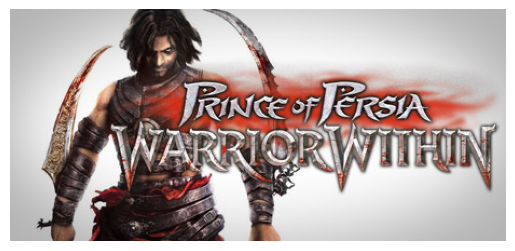

In [5]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)
plt.axis("off")
plt.show()

In [6]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [7]:
recommendations.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4


In [8]:
users.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [9]:
games.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [10]:
recommendations.isnull().sum()

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [11]:
users.isnull().sum()

user_id     0
products    0
reviews     0
dtype: int64

In [12]:
games.duplicated().sum()

0

In [13]:
users.duplicated().sum()

0

In [14]:
recommendations.duplicated().sum()

0

Popularity Based

In [15]:
recommender_with_name = recommendations.merge(games,on='app_id')

In [16]:
print("Before merge:", len(recommendations), len(games))
print("After merge:", len(recommender_with_name))

Before merge: 41154794 50872
After merge: 41154794


In [17]:
print(recommender_with_name.head())

    app_id  helpful  funny        date  is_recommended  hours  user_id  \
0   975370        0      0  2022-12-12            True   36.3    51580   
1   304390        4      0  2017-02-17           False   11.5     2586   
2  1085660        2      0  2019-11-17            True  336.5   253880   
3   703080        0      0  2022-09-23            True   27.4   259432   
4   526870        0      0  2021-01-10            True    7.9    23869   

   review_id           title date_release   win    mac  linux  \
0          0  Dwarf Fortress   2022-12-06  True  False  False   
1          1      FOR HONOR™   2017-02-13  True  False  False   
2          2       Destiny 2   2019-10-01  True  False  False   
3          3      Planet Zoo   2019-11-05  True  False  False   
4          4    Satisfactory   2020-06-08  True  False  False   

                    rating  positive_ratio  user_reviews  price_final  \
0  Overwhelmingly Positive              95         19665         30.0   
1                 

In [18]:
sample_id = recommender_with_name.loc[0, 'app_id']
print(games[games['app_id'] == sample_id])

       app_id           title date_release   win    mac  linux  \
48244  975370  Dwarf Fortress   2022-12-06  True  False  False   

                        rating  positive_ratio  user_reviews  price_final  \
48244  Overwhelmingly Positive              95         19665         30.0   

       price_original  discount  steam_deck  
48244             0.0       0.0        True  


In [19]:
sample_id = recommender_with_name.loc[0, 'app_id']
print(games[games['app_id'] == sample_id])

       app_id           title date_release   win    mac  linux  \
48244  975370  Dwarf Fortress   2022-12-06  True  False  False   

                        rating  positive_ratio  user_reviews  price_final  \
48244  Overwhelmingly Positive              95         19665         30.0   

       price_original  discount  steam_deck  
48244             0.0       0.0        True  


In [20]:
games_trimmed = games[['app_id', 'title', 'date_release', 'rating', 
                       'positive_ratio', 'user_reviews', 'price_final', 
                       'discount', 'steam_deck']].copy()

In [21]:
games_trimmed.head()

,app_id,title,date_release,rating,positive_ratio,user_reviews,price_final,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,Positive,85,21,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,Very Positive,92,3722,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,Mixed,61,873,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,Very Positive,88,8784,11.99,0.0,True


In [22]:
games_trimmed.loc[:, 'date_release'] = pd.to_datetime(games_trimmed['date_release'])
type(games)

pandas.core.frame.DataFrame

In [23]:
num_recommendations_df = recommender_with_name.groupby('title').count()['rating'].reset_index()
num_recommendations_df.rename(columns={'rating':'num_ratings'}, inplace=True)
num_recommendations_df.head()

,title,num_ratings
0,! That Bastard Is Trying To Steal Our Gold !,80
1,! Wild Russia !,48
2,!AnyWay!,331
3,!LABrpgUP!,39
4,#AkiRobots,11


In [24]:
num_recommendations_df = recommender_with_name.groupby('title').count()['rating'].reset_index()
num_recommendations_df.rename(columns={'rating':'num_ratings'}, inplace=True)

In [25]:
rating_map = {
    'Overwhelmingly Positive': 5,
    'Very Positive': 4,
    'Positive': 3,
    'Mixed': 2,
    'Negative': 1,
    'Very Negative': 0
}

In [26]:
# Create a numeric rating column
recommender_with_name['rating_numeric'] = recommender_with_name['rating'].map(rating_map)

In [27]:
avg_rating_df = recommender_with_name.groupby('title').agg(
    average_rating=('rating_numeric', 'mean')
).reset_index()

In [28]:
# Number of ratings per game
num_recommendations_df = recommender_with_name.groupby('title').agg(
    num_ratings=('rating_numeric', 'count')
).reset_index()

In [29]:
# Merge into a single DataFrame
popular_df = num_recommendations_df.merge(avg_rating_df, on='title')
popular_df.head()

,title,num_ratings,average_rating
0,! That Bastard Is Trying To Steal Our Gold !,80,2.0
1,! Wild Russia !,48,2.0
2,!AnyWay!,0,NaN
3,!LABrpgUP!,39,2.0
4,#AkiRobots,11,3.0


In [30]:
games['image_url'] = games['app_id'].apply(lambda x: f"https://cdn.akamai.steamstatic.com/steam/apps/{x}/header.jpg")

In [31]:
popular_df = popular_df.merge(
    games[['title', 'app_id', 'image_url', 'rating', 'positive_ratio', 'price_final']],
    on='title'
).drop_duplicates('title')

In [32]:
# Function to generate Steam image URL from app_id
def get_steam_image(app_id):
    return f"https://cdn.akamai.steamstatic.com/steam/apps/{app_id}/header.jpg"

popular_df = games.sort_values("user_reviews", ascending=False).head(25)
popular_df["image_url"] = popular_df["app_id"].apply(get_steam_image)
popular_df = popular_df[["title", "rating", "user_reviews", "price_final", "image_url"]]
popular_df

recommender_with_name.dtypes

app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
rating_numeric    float64
dtype: object

In [33]:
avg_rating_df = recommender_with_name.groupby('title').agg(
    avg_rating=('rating_numeric', 'mean'),
    num_ratings=('rating_numeric', 'count')
).reset_index()

In [34]:
popular_df = avg_rating_df.merge(games[['app_id', 'title']], on='title').drop_duplicates('title')
popular_df['popularity_score'] = popular_df['avg_rating'] * popular_df['num_ratings']
popular_df = popular_df.sort_values('popularity_score', ascending=False).head(25)

In [35]:
def get_steam_image(app_id):
    return f"https://cdn.akamai.steamstatic.com/steam/apps/{app_id}/header.jpg"

popular_df['image_url'] = popular_df['app_id'].apply(get_steam_image)
popular_df[['title', 'num_ratings', 'avg_rating', 'image_url']]

,title,num_ratings,avg_rating,image_url
30143,Team Fortress 2,319492,4.0,https://cdn.akamai.steamstatic.com/steam/apps/...
25653,Rust,270684,4.0,https://cdn.akamai.steamstatic.com/steam/apps/...
32090,The Witcher® 3: Wild Hunt,204166,5.0,https://cdn.akamai.steamstatic.com/steam/apps/...
34634,Wallpaper Engine,190129,5.0,https://cdn.akamai.steamstatic.com/steam/apps/...
7156,Cyberpunk 2077,226414,4.0,https://cdn.akamai.steamstatic.com/steam/apps/...
17135,Left 4 Dead 2,179684,5.0,https://cdn.akamai.steamstatic.com/steam/apps/...
10400,Euro Truck Simulator 2,179407,5.0,https://cdn.akamai.steamstatic.com/steam/apps/...
6572,Counter-Strike: Global Offensive,219737,4.0,https://cdn.akamai.steamstatic.com/steam/apps/...
8903,Dota 2,216914,4.0,https://cdn.akamai.steamstatic.com/steam/apps/...
22159,Paladins®,204176,4.0,https://cdn.akamai.steamstatic.com/steam/apps/...


Collaborative Filtering

In [36]:
a = recommender_with_name.groupby('app_id').count()['rating'] > 200
Gamers = a[a].index

In [37]:
filtered_rating = recommender_with_name[recommender_with_name['app_id'].isin(Gamers)]

In [38]:
b = filtered_rating.groupby('title').count()['rating_numeric'] >= 25
famous_games = b[b].index

In [39]:
final_filtered = filtered_rating[filtered_rating['title'].isin(famous_games)]

In [40]:
#Keep only active users
active_users = final_filtered.groupby('user_id').size()
active_users = active_users[active_users > 50].index

In [41]:
#Keep only popular games
popular_games = final_filtered.groupby('title').size()
popular_games = popular_games[popular_games > 50].index

In [42]:
#Subset the data
small_data = final_filtered[
    final_filtered['user_id'].isin(active_users) &
    final_filtered['title'].isin(popular_games)
]

In [43]:
pt = small_data.pivot_table(
    columns='title',
    values='rating_numeric',
    index='user_id',
).fillna(0)

In [44]:
pt

title,#monstercakes,$1 Ride,*NEW* SCUFFED EPIC BHOP SIMULATOR 2023 (POG CHAMP),.hack//G.U. Last Recode,//N.P.P.D. RUSH//- The milk of Ultraviolet,1 Screen Platformer,10 Second Ninja,10 Second Ninja X,100 hidden birds,100 hidden cats,...,隐世神剑传,雪之本境S Conspiracy Field: Snow Trap,风信楼,食用系少女 Food Girls,鬼谷八荒 Tale of Immortal,魔物讨伐团,鸢之歌-Singing Iris,黑色花与红山羊 / Black Datura & Red Goat,노베나 디아볼로스,👑 Idle Calibur 👑（选王之剑）
user_id,,,,,,,,,,,,,,,,,,,,,
1239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14300514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14304006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [46]:
PG_sparse = csr_matrix(pt.values)
similarity_scores = cosine_similarity(PG_sparse.T, dense_output=False)
similarity_scores.shape

(7155, 7155)

In [47]:
similarity = similarity_scores

In [48]:
# Add image URLs to final_filtered
final_filtered = final_filtered.merge(
    games[['app_id', 'title', 'image_url']].drop_duplicates('title'),
    on='title',
    how='left'
)

In [49]:
import IPython.display as display
from IPython.core.display import HTML

In [50]:
def recommend(game_name, top_n=12):
    if game_name not in pt.columns:
        print(f"Game '{game_name}' not found in dataset.")
        return
    
    # Get the index of the input game in the pivot table
    game_idx = list(pt.columns).index(game_name)
    
    # Get similarity scores for this game
    sim_scores = similarity_scores[game_idx].toarray().flatten()
    
    # Get indices of similar games, excluding the input game itself
    similar_indices = sim_scores.argsort()[::-1][1:top_n+1]
    
    # Get the titles of recommended games
    recommended_titles = [pt.columns[i] for i in similar_indices]
    
    # Get game data for recommendations directly from games dataframe
    recommendations_data = []
    for title in recommended_titles:
        # Get game info from the original games dataframe
        game_match = games[games['title'] == title]
        if not game_match.empty:
            game_info = game_match.iloc[0]
            # Get rating from final_filtered if available, otherwise use games rating
            rating_match = final_filtered[final_filtered['title'] == title]
            if not rating_match.empty:
                rating = rating_match.iloc[0]['rating']
            else:
                rating = game_info['rating']
                
            recommendations_data.append({
                'title': title,
                'image_url': f"https://cdn.akamai.steamstatic.com/steam/apps/{game_info['app_id']}/header.jpg",
                'rating': rating,
                'app_id': game_info['app_id']
            })
    
    # Build HTML card layout
    cards_html = """
    <div style='display:flex; flex-wrap:wrap; gap:15px; justify-content:center; 
                background:#0a0a0a; padding:20px; border-radius:15px;'>
    <h2 style='width:100%; text-align:center; color:#ffffff; margin-bottom:20px; 
               font-family:Arial,sans-serif;'>Games Similar to {}</h2>
    """.format(game_name)
    
    for game in recommendations_data:
        cards_html += f"""
        <div style="width:280px; border-radius:15px; overflow:hidden;
                    box-shadow:0px 6px 15px rgba(0,0,0,0.4); 
                    background:linear-gradient(145deg, #1a1a2e, #16213e); 
                    color:white; text-align:center; padding:15px;
                    transition:transform 0.3s ease, box-shadow 0.3s ease;
                    border:1px solid #333;">
            <img src="{game['image_url']}" 
                 style="width:100%; height:140px; object-fit:cover; 
                        border-radius:10px; margin-bottom:10px;
                        border:2px solid #444;"/>
            <h3 style="margin:10px 0; font-size:16px; color:#ffffff; 
                       font-family:Arial,sans-serif; line-height:1.3;
                       min-height:40px; display:flex; align-items:center; 
                       justify-content:center;">{game['title']}</h3>
            <div style="background:rgba(255,255,255,0.1); padding:8px; 
                        border-radius:8px; margin-top:10px;">
                <p style="margin:0; color:#4CAF50; font-weight:bold; 
                          font-size:14px;">Rating: {game['rating']}</p>
            </div>
        </div>
        """
    cards_html += "</div>"
    
    display.display(HTML(cards_html))

In [51]:
recommend('DARK SOULS™ III')

In [52]:
import pickle
pickle.dump(popular_df,open('popular.PG','wb'))

In [53]:
pickle.dump(pt,open('pt.pg','wb'))
pickle.dump(games,open('games.gkm','wb'))
pickle.dump(similarity_scores,open('similarity_scores.','wb'))